In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Splitting Features And Labels:

In [4]:
X = df.drop('sales', axis = 1)

In [5]:
y = df['sales']

Creating Polynomial Features:

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False) #Creating an instance of the PolynomialFeatures class
#By default, the degree is 2
#include_bias adds the '1' column to the PolynomialFeatures object

In [8]:
polynomial_converter.fit(X) #Note that we haven't split into train and test sets yet

PolynomialFeatures(include_bias=False)

In [9]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]],
      shape=(200, 9))

In [10]:
polynomial_converter.transform(X).shape

(200, 9)

In [11]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [12]:
poly_features = polynomial_converter.transform(X)

In [13]:
poly_features.shape

(200, 9)

In [14]:
poly_features[0] #The first 3 values are the original feature values
#Terms 4, 5, and 7 by index next 3 values are the interaction terms
#The remaining 3 terms are the square terms

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [15]:
230.1 * 37.8

8697.779999999999

In [16]:
230.1 * 69.2

15922.92

In [17]:
37.8 * 69.2

2615.7599999999998

In [18]:
230.1 ** 2

52946.009999999995

In [19]:
polynomial_converter.fit_transform(X) #This performs both the fit and the transform steps in one line

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]],
      shape=(200, 9))

Train-Test Split:

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)

Creating The Model:

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

Performance Evaluation:

In [25]:
test_predictions = model.predict(X_test)

In [26]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
MAE = mean_absolute_error(y_test, test_predictions)

In [29]:
MSE = mean_squared_error(y_test, test_predictions)

In [30]:
RMSE = np.sqrt(MSE)

In [ ]:
MAE #In the previous notebook's model, the MAE was 1.213

0.48967980448035886

In [ ]:
RMSE #In the previous notebook's model, the RMSE was 1.516

np.float64(0.6646431757269)

In [35]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [33]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [34]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [36]:
69.2 ** 2

4788.64

Choosing The Optimal Degree:

In [37]:
# create the different order poly
# split poly feat train/test
# fit on train
# store/save the rmse for BOTH the train AND test
# PLOT the results (error vs poly order)

In [52]:
train_rmse_errors = [] #A list that stores the training set RMSE values for various model degrees
test_rmse_errors = [] #A list that stores the testing set RMSE values for various model degrees

for d in range(1, 10): #Generating the degree values to test with
    
    poly_converter = PolynomialFeatures(degree = d, include_bias = False) #Creating the poly converter for the d-th degree model
    poly_features = poly_converter.fit_transform(X) #Creating the poly features for the d-th degree model
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101) #Splitting the data with poly features into train/test sets for the d-th degree model

    model = LinearRegression() #Initializing the model object for the d-th degree model
    model.fit(X_train, y_train) #Fitting the model to the training data for the d-th degree model
    
    #Predicting both the train and test label values 
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    #Calculating the RMSEs of both the train and test data for the d-th degree model
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    #Saving the RMSEs as new entries to their corresponding lists
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [53]:
train_rmse_errors

[np.float64(1.734594124329376),
 np.float64(0.5879574085292234),
 np.float64(0.43393443569020657),
 np.float64(0.35170836883993556),
 np.float64(0.2509342923789987),
 np.float64(0.20953728390810636),
 np.float64(0.220468592026013),
 np.float64(0.27150074924450723),
 np.float64(0.5132041534764078)]

In [54]:
test_rmse_errors

[np.float64(1.5161519375993877),
 np.float64(0.6646431757269),
 np.float64(0.5803286825219469),
 np.float64(0.5077742640851456),
 np.float64(2.575819388953378),
 np.float64(9.87141360632477),
 np.float64(41.33052004954889),
 np.float64(3108.5907535489564),
 np.float64(12767.649350485362)]

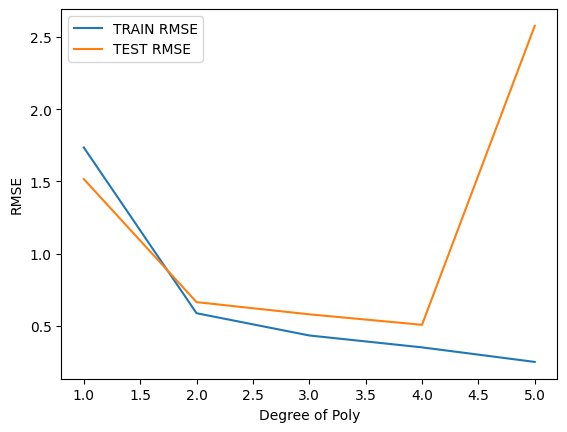

In [57]:
plt.plot(range(1, 6), train_rmse_errors[:5], label = 'TRAIN RMSE')
plt.plot(range(1, 6), test_rmse_errors[:5], label = 'TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

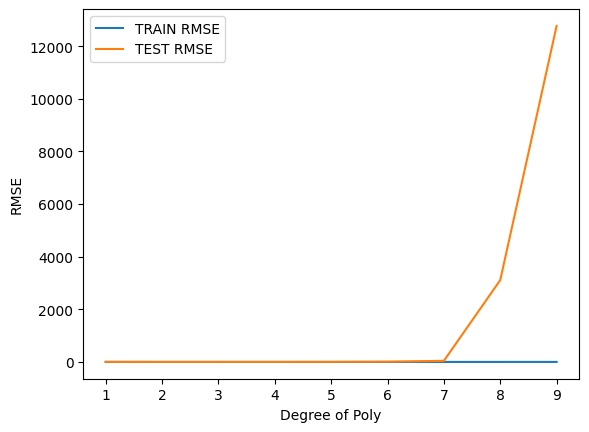

In [58]:
plt.plot(range(1, 10), train_rmse_errors, label = 'TRAIN RMSE')
plt.plot(range(1, 10), test_rmse_errors, label = 'TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

Deploying A 3rd Degree Finalized Model:

In [59]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [60]:
final_model = LinearRegression()

In [61]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [62]:
from joblib import dump, load

In [63]:
dump(final_model, 'final_poly_model.joblib') #Saving the final polynomial model

['final_poly_model.joblib']

In [64]:
dump(final_poly_converter, 'final_converter.joblib') #Saving the final polynomial converter

['final_converter.joblib']

Using The Polynomial Model:

In [65]:
loaded_converter = load('final_converter.joblib')

In [66]:
loaded_model = load('final_poly_model.joblib')

In [67]:
campaign = [[149, 22, 12]]

In [69]:
transformed_data = loaded_converter.fit_transform(campaign)

In [70]:
transformed_data.shape

(1, 19)

In [ ]:
loaded_model.predict(transformed_data) #In the previous notebook's model, the predicted sales values was 13.89

array([14.64501014])